In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 
import seaborn as sns

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 56.0 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=fc2cc76a3d2713876a7c5133c00103b92e8de5801cbb3a96e79902963b3172a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-e97i3pde/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [20]:
import en_core_web_lg

In [2]:
!pip install pyldavis

In [15]:
import pyLDAvis
import pyLDAvis.gensim_models

let us start with the analysis of complaints where the officers were disciplined

In [5]:
df_disciplined = pd.read_csv("/content/drive/MyDrive/DSS_CP5/data_cp5_disciplined.csv")
df_disciplined.head()

,crid,incident_year,is_officer_complaint,cr_text,category,allegation_name,text_content,complaint_narrative,officer_id,disciplined,gender,race,rank,current_salary,allegation_count,discipline_count,honorable_mention_count,major_award_count,civilian_compliment_count
0,1061320,2007,True,NaN,Conduct Unbecoming (Off-Duty),Indebtedness To City,AUTO CR - LOG SUMMARY #1061320\n\nTYPE: CR\n\n...,for,12007,True,M,Hispanic,Police Officer,93354.0,33,3,16,0,3
1,1051363,2012,True,Initial / Intake Allegation 1: It is reported ...,Lockup Procedures,Search - Person / Property,AUTO CR - LOG SUMMARY #1051363\n\nTYPE: CR\n\n...,It is reported that the accused officers were\...,25965,True,M,White,Sergeant of Police,107988.0,12,2,25,0,1
2,1051363,2012,True,Initial / Intake Allegation 1: It is reported ...,Lockup Procedures,Search - Person / Property,AUTO CR - LOG SUMMARY #1051363\n\nTYPE: CR\n\n...,SUSTAINED,25965,True,M,White,Sergeant of Police,107988.0,12,2,25,0,1
3,1051363,2012,True,Initial / Intake Allegation 1: It is reported ...,Lockup Procedures,Search - Person / Property,AUTO CR - LOG SUMMARY #1051363\n\nTYPE: CR\n\n...,It is reported that the accused officers were\...,25965,True,M,White,Sergeant of Police,107988.0,12,2,25,0,1
4,1051363,2012,True,Initial / Intake Allegation 1: It is reported ...,Lockup Procedures,Search - Person / Property,AUTO CR - LOG SUMMARY #1051363\n\nTYPE: CR\n\n...,"The reporting party, Sgt. William KAPPEL, star...",25965,True,M,White,Sergeant of Police,107988.0,12,2,25,0,1


In [6]:
df_disciplined.shape

(1501, 19)

In [7]:
df_disciplined["crid"].nunique()

392

In [8]:
df_disciplined_fil = df_disciplined.drop_duplicates(subset=['crid'])
df_disciplined_fil.shape

(392, 19)

In [9]:
df_disciplined_fil["complaint_narrative"].isna().sum()

0

In [24]:
complaint_narrative_disciplined = df_disciplined_fil["complaint_narrative"].tolist()

Let us look at a few complaints

In [25]:
for complaint in complaint_narrative_disciplined[0:5]:
  print(complaint)
  print('======================')

for
It is reported that the accused officers were
inattentative to duty in that, the accused
officer failed to properly search a prisoner's
property bag (Back Pack), which resulted
into retrieving three (3) bags of green leafy
substance suspect as cannabis which was
not inventoried at that time.
It is reported that the accused officers were
inattentative to duty in that, the accused
officer failed to properly search a prisoner's
property bag (Back Pack), which resulted
into retrieving three (3) bags of green leafy
substance, suspect as cannabis which was
not inventoried at that time.
It is reported that the accused officers
submitted a false police report in that, they
identified officers who did not participate in
an arrest and identified those officers as
“First Arresting Officer” and Second
Arresting Officer.”
It is reported that the accused officers
submitted a false police report in that, they
identified officers who did not participate in
an arrest and identified those officers a

In [21]:
nlp = en_core_web_lg.load()

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [60]:
def create_complaint_corpus(complaint_list, custom_lemmas=[]):
    
    corpus = []
    words_dict = {}
    
    for cur_complaint in complaint_list:

      cur_complaint_tokens = []  
      doc = nlp(cur_complaint.lower())

      for token in doc:
        
        if token.lemma_ != '-PRON-' and len(token.lemma_) > 1 and not token.is_space and not token.is_stop and not token.is_punct and not token.like_num:

          if token.lemma_ not in custom_lemmas:
            
            cur_complaint_tokens.append(token.lemma_)
            words_dict[token.lemma_] = words_dict.get(token.lemma_, 0) + 1
            
      if len(cur_complaint_tokens) > 0:
        corpus.append(cur_complaint_tokens)
                
                
    return (corpus, words_dict)

In [36]:
def plot_word_count_bar_chart(word_dict, num_of_words, type_of_report, x_label='Word', y_label='Count'):
  #convert the word dict to list of items and then sort it by count and showcase the top n words with most frequency
  word_count_list = sorted(list(word_dict.items()), reverse=True, key=lambda word: word[1])[0:num_of_words]
  word_count_df = pd.DataFrame(word_count_list, columns=[x_label, y_label])
  ax = sns.barplot(x=x_label, y=y_label, data=word_count_df)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
  ax.set_title('Most frequent words in the ' + type_of_report + ' complaint reports')
  plt.show()

In [28]:
corpus_disciplined, words_dict_disciplined = create_complaint_corpus(complaint_narrative_disciplined)

In [29]:
len(corpus_disciplined)

386

let us look at some sample corpus

In [30]:
for cur_corpus in corpus_disciplined[0:5]:
  print(cur_corpus)
  print('==============================================')

['report', 'accuse', 'officer', 'inattentative', 'duty', 'accuse', 'officer', 'fail', 'properly', 'search', 'prisoner', 'property', 'bag', 'pack', 'result', 'retrieve', 'bag', 'green', 'leafy', 'substance', 'suspect', 'cannabis', 'inventorie', 'time', 'report', 'accuse', 'officer', 'inattentative', 'duty', 'accuse', 'officer', 'fail', 'properly', 'search', 'prisoner', 'property', 'bag', 'pack', 'result', 'retrieve', 'bag', 'green', 'leafy', 'substance', 'suspect', 'cannabis', 'inventorie', 'time']
['report', 'accuse', 'officer', 'submit', 'false', 'police', 'report', 'identify', 'officer', 'participate', 'arrest', 'identify', 'officer', 'arrest', 'officer', 'second', 'arrest', 'officer', 'report', 'accuse', 'officer', 'submit', 'false', 'police', 'report', 'identify', 'officer', 'participate', 'arrest', 'identify', 'officer', 'arrest', 'officer', 'second', 'arrest', 'officer']
['report', 'accuse', 'officer', 'fail', 'provide', 'department', 'current', 'address']
['report', 'accuse', 's

In [31]:
sns.set(font_scale=1.5)
pylab.rcParams['figure.figsize'] = 18, 6

let us look at the word count distribution in disciplined reports

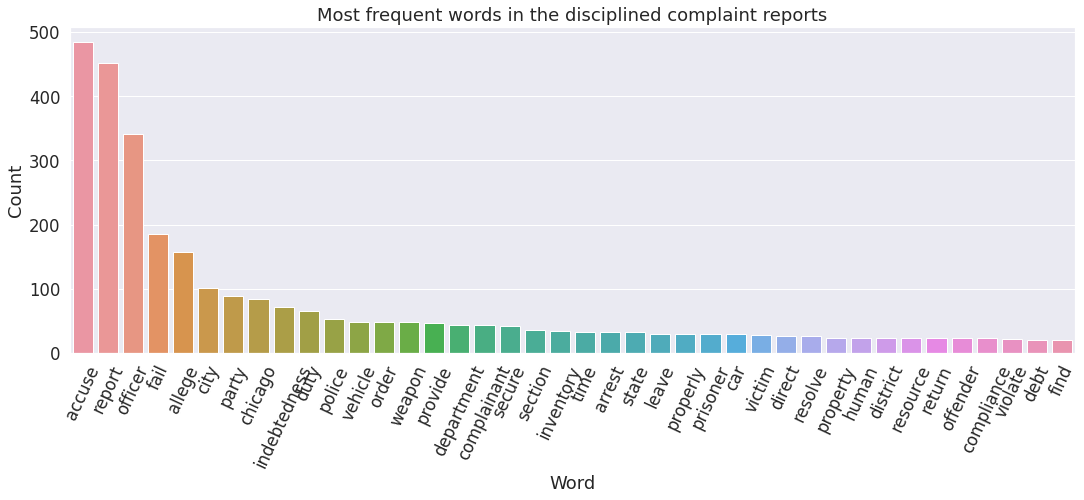

In [37]:
plot_word_count_bar_chart(words_dict_disciplined, num_of_words=40, type_of_report='disciplined')

After going through the above word count bar chart, we can create some additional custom stop words prior to topic modeling. We already know that these are compliant reports on Chicago police officers. so, words such as accuse, report, officer, allege, chicago, police can be added to the stop words list

In [61]:
custom_stop_words = ["accuse", "report", "officer", "allege", "city", "chicago", "police"]

let us recreate the corpus again

In [62]:
corpus_disciplined, words_dict_disciplined = create_complaint_corpus(complaint_narrative_disciplined, custom_stop_words)

In [63]:
len(corpus_disciplined)

378

let us relook at the corpus sample once again


In [64]:
for cur_corpus in corpus_disciplined[0:5]:
  print(cur_corpus)
  print('==============================================')

['inattentative', 'duty', 'fail', 'properly', 'search', 'prisoner', 'property', 'bag', 'pack', 'result', 'retrieve', 'bag', 'green', 'leafy', 'substance', 'suspect', 'cannabis', 'inventorie', 'time', 'inattentative', 'duty', 'fail', 'properly', 'search', 'prisoner', 'property', 'bag', 'pack', 'result', 'retrieve', 'bag', 'green', 'leafy', 'substance', 'suspect', 'cannabis', 'inventorie', 'time']
['submit', 'false', 'identify', 'participate', 'arrest', 'identify', 'arrest', 'second', 'arrest', 'submit', 'false', 'identify', 'participate', 'arrest', 'identify', 'arrest', 'second', 'arrest']
['fail', 'provide', 'department', 'current', 'address']
['sign', 'radio', 'leave', 'partner', 'today', 'date', 'able', 'locate', 'radio']
['inattentive', 'duty', 'fail', 'properly', 'secure', 'weapon', 'go', 'fitting', 'room', 'carson', 'pirie', 'scott', 'leave', 'duty', 'weapon', 'fitting', 'room', 'weapon', 'recover', 'hammond', 'department']


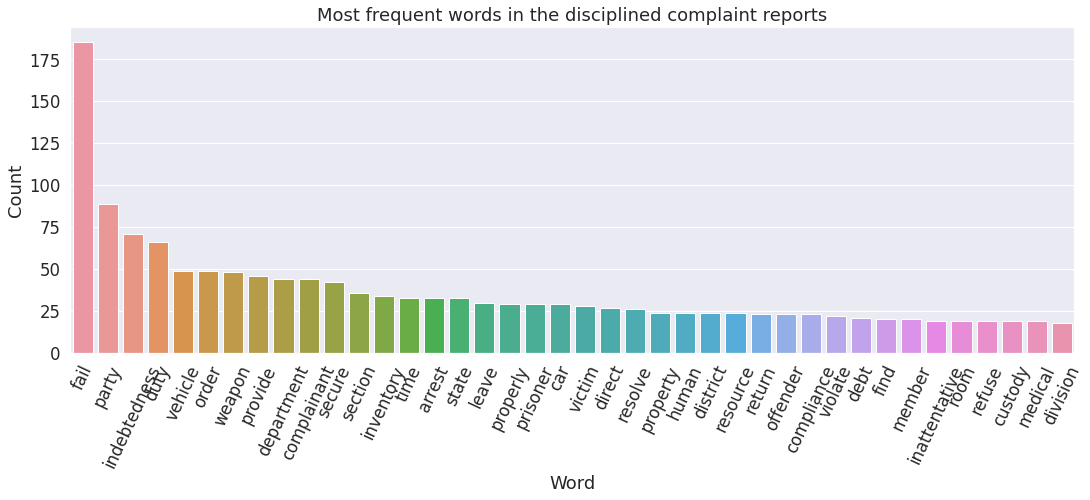

In [65]:
plot_word_count_bar_chart(words_dict_disciplined, num_of_words=40, type_of_report='disciplined')

In [66]:
bigram_disciplined = gensim.models.Phrases(corpus_disciplined)

In [67]:
corpus_disciplined_with_bigram = [bigram_disciplined[cur_complaint] for cur_complaint in corpus_disciplined]

In [74]:
corpus_disciplined_with_bigram[300]

['fail_secure', 'weapon', 'inside', 'residence']

In [75]:
corpus_disciplined[300]

['fail', 'secure', 'weapon', 'inside', 'residence']

In [76]:
dictionary_disciplined = Dictionary(corpus_disciplined_with_bigram)
print(dictionary_disciplined)

Dictionary(1341 unique tokens: ['bag', 'cannabis', 'fail_properly', 'green', 'inattentative_duty']...)


In [77]:
corpus_disciplined_for_topic_model = [dictionary_disciplined.doc2bow(cur_complaint) for cur_complaint in corpus_disciplined_with_bigram]

In [78]:
corpus_disciplined_for_topic_model[2]

[(22, 1), (23, 1), (24, 1), (25, 1)]

We will start with Hierarchical Dirichlet Process (HDP) Topic Modelling Algorithm, we don't have to specify the number of topics here, the algorithm will find out the best value for number of topics.

In [79]:
hdpModel_disciplined = HdpModel(corpus=corpus_disciplined_for_topic_model, id2word=dictionary_disciplined)

In [114]:
len(hdpModel_disciplined.show_topics())

20

In [80]:
hdpModel_disciplined.show_topics()

[(0,
  '0.004*text + 0.004*contraband + 0.004*october + 0.004*district_station + 0.004*answer + 0.004*vand + 0.004*harass + 0.003*pd + 0.003*file + 0.003*walbum + 0.003*x00105792 + 0.003*damage + 0.003*equipment + 0.003*revenue + 0.003*inattention + 0.003*remain + 0.003*argumentative + 0.003*concern + 0.003*street + 0.003*charger'),
 (1,
  '0.006*request + 0.005*worth + 0.005*wall + 0.004*anymore + 0.004*isssue + 0.004*person + 0.004*facebook + 0.004*3c + 0.004*arterio + 0.004*resolve + 0.004*vernetta + 0.004*475.00- + 0.004*discourteous + 0.004*observe + 0.003*employee + 0.003*harass + 0.003*brief + 0.003*subsequently + 0.003*vice + 0.003*cpd'),
 (2,
  '0.005*iv + 0.005*aco + 0.005*party + 0.005*walbum + 0.005*interview + 0.005*ken + 0.005*betore + 0.004*task + 0.004*hit + 0.004*eugene + 0.004*spann + 0.004*performance + 0.004*investigation + 0.004*nextel + 0.004*point + 0.004*parking + 0.004*deodorant + 0.003*tule_disobedient + 0.003*paper + 0.003*house'),
 (3,
  '0.005*handicap + 0.

In [81]:
hdp_coherence_model_disciplined = CoherenceModel(model=hdpModel_disciplined, texts=corpus_disciplined_with_bigram, dictionary=dictionary_disciplined, coherence='c_v')
hdp_coherence_disciplined = hdp_coherence_model_disciplined.get_coherence()
hdp_coherence_disciplined

0.7805017723461112

Next, we are going to try with Latent Semantic Indexing (LSI) model, here we need to pass the number of topics, based on the coherence score we can figure out the best "number of topics"

In [96]:
best_lsiModel_disciplined = None
best_coherence_val = 0
for num_topics in [3, 5, 8, 10, 15, 20, 25, 30]:
    lsiModel = LsiModel(corpus=corpus_disciplined_for_topic_model, num_topics=num_topics, id2word=dictionary_disciplined)
    coherenceModel = CoherenceModel(model=lsiModel, texts=corpus_disciplined_with_bigram, dictionary=dictionary_disciplined, coherence='c_v')
    coherence_val = coherenceModel.get_coherence()
    print('Number of Topics', num_topics)
    print('Coherence Value', coherence_val)
    if coherence_val > best_coherence_val:
      best_coherence_val = coherence_val
      best_lsiModel_disciplined = lsiModel

Number of Topics 3
Coherence Value 0.42058341603667043
Number of Topics 5
Coherence Value 0.612993363009684
Number of Topics 8
Coherence Value 0.5473265481695828
Number of Topics 10
Coherence Value 0.4545004261863248
Number of Topics 15
Coherence Value 0.47626781301862303
Number of Topics 20
Coherence Value 0.4722749759637642
Number of Topics 25
Coherence Value 0.4648218864166996
Number of Topics 30
Coherence Value 0.46258726913237774


In [97]:
len(best_lsiModel_disciplined.show_topics())

5

In [98]:
best_lsiModel_disciplined.show_topics()

[(0,
  '-0.716*"party" + -0.189*"fail" + -0.150*"complaint" + -0.145*"victim" + -0.128*"state" + -0.125*"inventory" + -0.116*"garage" + -0.115*"mail" + -0.113*"take" + -0.108*"vehicle"'),
 (1,
  '-0.592*"inventory" + -0.275*"time" + 0.241*"party" + -0.218*"count" + -0.207*"arrestee" + -0.169*"inventorie" + -0.166*"fail" + -0.161*"inattentive_duty" + -0.155*"fail_properly" + -0.137*"money"'),
 (2,
  '0.558*"offender" + 0.347*"seat" + 0.208*"flee" + 0.205*"handcuff" + 0.199*"vehicle" + 0.195*"custody" + 0.194*"transport" + 0.184*"chase" + 0.166*"processing" + 0.165*"foot"'),
 (3,
  '0.545*"arrestee" + 0.337*"fail_properly" + 0.295*"inattentive_duty" + 0.293*"result" + 0.292*"secure" + 0.265*"escape_custody" + -0.229*"inventory" + -0.189*"time" + -0.174*"count" + 0.104*"prisoner"'),
 (4,
  '0.401*"fail" + 0.386*"complainant" + 0.181*"leave" + -0.180*"party" + 0.170*"fail_provide" + 0.147*"state" + 0.141*"nellum" + -0.133*"inventory" + 0.115*"request" + 0.112*"refuse"')]

Next, we are going to try with Latent Dirichlet Allocation (LDA) model, here we need to pass the number of topics, based on the coherence score we can figure out the best "number of topics"

In [110]:
best_ldaModel_disciplined = None
best_coherence_val = 0
for num_topics in [3, 5, 8, 10, 15, 20, 25, 30]:

  ldaModel = LdaModel(corpus=corpus_disciplined_for_topic_model, num_topics=num_topics, id2word=dictionary_disciplined)
  coherenceModel = CoherenceModel(model=ldaModel, texts=corpus_disciplined_with_bigram, dictionary=dictionary_disciplined, coherence='c_v')
  coherence_val = coherenceModel.get_coherence()
  print('Number of Topics', num_topics)
  print('Coherence Value', coherence_val)
  if coherence_val > best_coherence_val:
    best_coherence_val = coherence_val
    best_ldaModel_disciplined = ldaModel

Number of Topics 3
Coherence Value 0.4268679463324514
Number of Topics 5
Coherence Value 0.43766769271228584
Number of Topics 8
Coherence Value 0.48298388843518814
Number of Topics 10
Coherence Value 0.45946831483450123
Number of Topics 15
Coherence Value 0.4307386436296576
Number of Topics 20
Coherence Value 0.42732928784992746
Number of Topics 25
Coherence Value 0.4366236428849735
Number of Topics 30
Coherence Value 0.4404924329111391


In [111]:
len(best_ldaModel_disciplined.show_topics())

8

In [112]:
best_ldaModel_disciplined.show_topics()

[(0,
  '0.035*"party" + 0.015*"fail" + 0.011*"complaint" + 0.010*"victim" + 0.010*"weapon" + 0.009*"indebtedness" + 0.009*"violate" + 0.008*"vehicle" + 0.008*"duty" + 0.008*"debt"'),
 (1,
  '0.019*"party" + 0.015*"department" + 0.010*"prisoner" + 0.010*"witness" + 0.008*"assign" + 0.008*"transport" + 0.008*"vehicle" + 0.008*"take" + 0.007*"post" + 0.007*"public"'),
 (2,
  '0.032*"fail" + 0.018*"arrest" + 0.016*"fail_provide" + 0.015*"resolve_indebtedness" + 0.013*"date_question" + 0.013*"debt_human" + 0.013*"administration_require" + 0.013*"resource_division" + 0.013*"receive_notice" + 0.013*"proof_resolve"'),
 (3,
  '0.032*"fail" + 0.016*"party" + 0.014*"vehicle" + 0.014*"offender" + 0.010*"department" + 0.010*"complainant" + 0.009*"arrest" + 0.009*"time" + 0.009*"find" + 0.007*"car"'),
 (4,
  '0.027*"weapon" + 0.024*"indebtness" + 0.012*"complainant" + 0.011*"fail" + 0.010*"state" + 0.010*"incident" + 0.010*"sustain" + 0.009*"return" + 0.008*"medical" + 0.008*"duty"'),
 (5,
  '0.019*

Next we are going to use the pyLDAvis package to visualize the best LDA model results

In [113]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(best_ldaModel_disciplined, corpus_disciplined_for_topic_model, dictionary_disciplined)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.040093  0.035214       1        1  15.966771
0     -0.036463 -0.075713       2        1  15.077789
6     -0.082328 -0.040955       3        1  14.213726
7      0.061363  0.136521       4        1  13.654066
5      0.139496 -0.029648       5        1  13.331874
2     -0.153207  0.069513       6        1  11.474966
4      0.004387 -0.062627       7        1   9.806858
1      0.026657 -0.032306       8        1   6.473952, topic_info=             Term       Freq      Total Category  logprob  loglift
965  indebtedness  38.000000  38.000000  Default  30.0000  30.0000
968    indebtness  12.000000  12.000000  Default  29.0000  29.0000
45         weapon  35.000000  35.000000  Default  28.0000  28.0000
8        prisoner  22.000000  22.000000  Default  27.0000  27.0000
48          party  71.000000  71.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
310   complainant   1.986784  34.581314   Topic8  -4.9977  -0.1194
123        victim   1.716068  22.847197   Topic8  -5.1441   0.1486
62      complaint   1.453322  13.797570   Topic8  -5.3103   0.4867
46           fail   1.448478  82.691893   Topic8  -5.3137  -1.3072
260      incident   1.362994  13.356361   Topic8  -5.3745   0.4551

[510 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
732       8  0.711909  007th
402       1  0.520103     1s
402       3  0.130026     1s
402       6  0.130026     1s
392       5  0.774545    2nd
...     ...       ...    ...
479       6  0.460808   word
210       1  0.171366   work
210       5  0.171366   work
210       6  0.342733   work
210       7  0.342733   work

[949 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 7, 8, 6, 3, 5, 2])